In [1]:
import sklearn
import scipy
import pycaret
import botorch
import torch
import gpytorch
import pandas as pd

c:\Users\99823827\Anaconda3\envs\Dissertacao_nightly\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\99823827\Anaconda3\envs\Dissertacao_nightly\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\99823827\Anaconda3\envs\Dissertacao_nightly\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\99823827\Anaconda3\envs\Dissertacao_nightly\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df=pd.read_csv("..\data_gen\data_to_modeling.csv",sep='\t',dtype='float',index_col=0)
df

,depth,vc,rake_angle,clearance_angle,expected_cut_force,A,B,C,n,m,d1,d2,d3,d4,d5,densidade,young_modulus,poisson_coef
0.0,0.5,3000.0,-10.0,5.0,6063.298535,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
1.0,0.5,3000.0,-7.0,5.0,4420.143506,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
2.0,0.5,3000.0,-4.0,5.0,5492.385645,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
3.0,0.5,3000.0,-1.0,5.0,4820.064746,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
4.0,0.5,3000.0,2.0,5.0,3987.947656,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319.0,0.5,4500.0,2.0,5.0,4818.066699,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
320.0,0.5,4500.0,5.0,5.0,3898.750684,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
321.0,0.5,4500.0,8.0,5.0,5058.776172,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
322.0,0.5,4500.0,11.0,5.0,5383.911328,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269


In [3]:
ignore_features=["d1","d2","d3","d4","d5","densidade",] #devido a erro no pycaret, vou fazer exclusão forçada das variáveis
df_1=df.drop(ignore_features,axis=1)

In [4]:
df_1.isna().any()

depth                 False
vc                    False
rake_angle            False
clearance_angle       False
expected_cut_force    False
A                     False
B                     False
C                     False
n                     False
m                     False
young_modulus         False
poisson_coef          False
dtype: bool

# Modelagem com expansão nas features

In [5]:
from pycaret.regression import *
s = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          profile=False
)

,Description,Value
0,Session id,4949
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(324, 12)"
4,Transformed data shape,"(324, 78)"
5,Transformed train set shape,"(226, 78)"
6,Transformed test set shape,"(98, 78)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,None


In [6]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:32:53
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,328.0190,232197.4455,476.3662,0.9616,0.0972,0.0729,0.1090
lightgbm,Light Gradient Boosting Machine,330.2177,231067.3866,475.9762,0.9614,0.0988,0.0747,0.0950
lasso,Lasso Regression,384.8438,247079.2453,492.6119,0.9589,0.1135,0.0922,0.3260
en,Elastic Net,386.4239,248913.2438,494.5668,0.9587,0.1172,0.0934,0.0250
rf,Random Forest Regressor,325.6559,253844.2913,500.2199,0.9586,0.0978,0.0698,0.1820
catboost,CatBoost Regressor,332.3835,254575.2711,500.2000,0.9579,0.1019,0.0746,1.1240
llar,Lasso Least Angle Regression,379.8804,254260.7359,499.2735,0.9574,0.1084,0.0860,0.0300
omp,Orthogonal Matching Pursuit,381.3133,259550.6641,505.0152,0.9560,0.1103,0.0888,0.0280
lr,Linear Regression,388.0120,267812.4344,513.0640,0.9552,0.1131,0.0901,0.8270
ada,AdaBoost Regressor,409.4337,273027.3867,518.1395,0.9549,0.1184,0.0985,0.0550


## Investigando Lasso

In [7]:
lasso=create_model("lasso")
lasso

Lasso(random_state=4949)

In [10]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

A : 7.1817
B : 2.0690
depth*vc : 0.7248
depth*A : 0.1497
depth*B : 0.6022
vc*rake_angle : 0.0024
vc*clearance_angle : 0.1767
vc*C : 0.0934
vc*n : 0.3659
vc*m : 0.1028
rake_angle^2 : 2.8130
rake_angle*A : 0.0385
rake_angle*C : 772.3182
rake_angle*poisson_coef : 34.8144
clearance_angle*A : 0.1279
clearance_angle*B : 0.1429
A*n : 0.6142
A*m : 0.4780
B*n : 0.5485
B*m : 2.0684


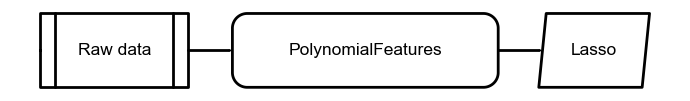

In [9]:
plot_model(lasso,"pipeline")

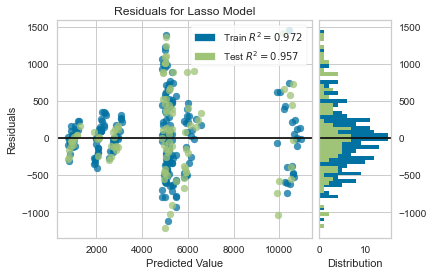

In [29]:
plot_model(lasso, plot='residuals')

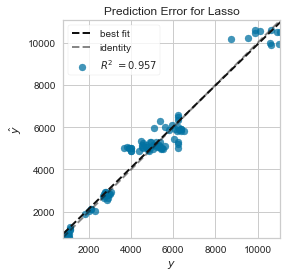

In [30]:
plot_model(lasso, plot='error')

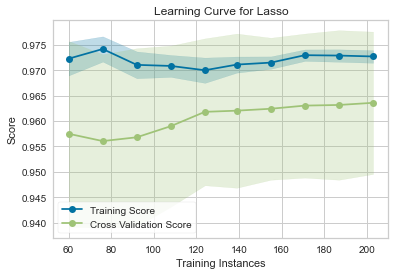

In [31]:
plot_model(lasso, plot='learning')

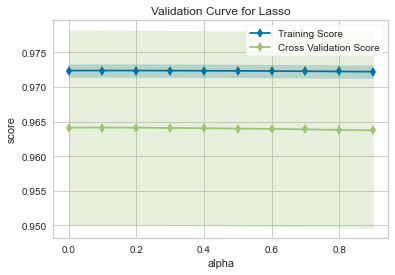

In [32]:
plot_model(lasso, plot='vc')

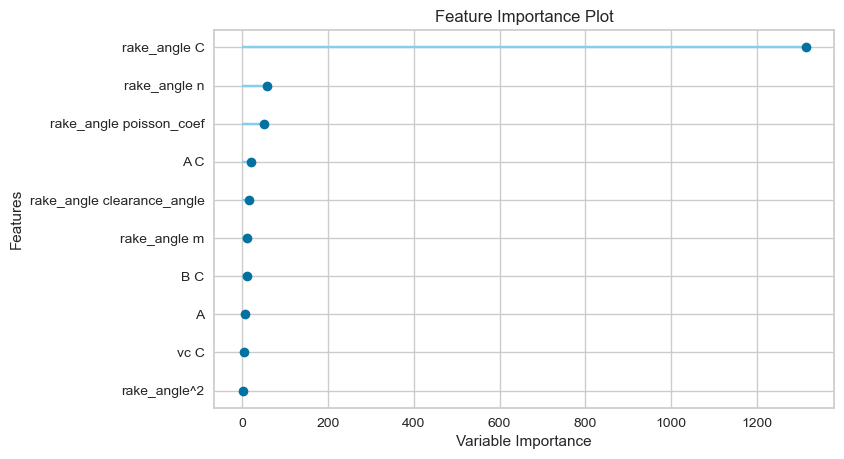

In [33]:
plot_model(lasso, plot='feature')

In [34]:
save_model(lasso,"models/lasso_v0",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\99823827\AppData\Local\Temp\joblib),
          steps=[('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('trained_model', Lasso(random_state=6409))]),
 'models/lasso_v0.pkl')

### investigando estatisticas dos pesos do lasso

## Investigando LightGBM

In [11]:
lgbm=create_model("lightgbm")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:36:41
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,345.5918,241729.9034,491.6604,0.9124,0.0992,0.0744
1,380.5299,247881.3324,497.8768,0.9759,0.1067,0.0854
2,308.6391,215485.2509,464.2039,0.9750,0.0955,0.0660
3,334.9931,271191.4938,520.7605,0.9384,0.1094,0.0809
4,341.6036,180615.9043,424.9893,0.9696,0.0801,0.0645
5,262.9066,126250.5314,355.3175,0.9809,0.0819,0.0669
6,327.2852,255008.5691,504.9837,0.9669,0.0965,0.0763
7,260.8577,168067.7020,409.9606,0.9735,0.0891,0.0613
8,414.9414,380759.9828,617.0575,0.9410,0.1378,0.0983


In [12]:
lgbm

LGBMRegressor(random_state=4949)

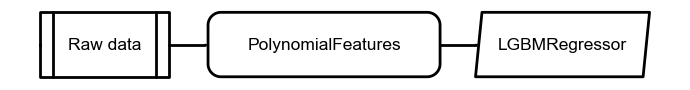

In [14]:
plot_model(lgbm, "pipeline")

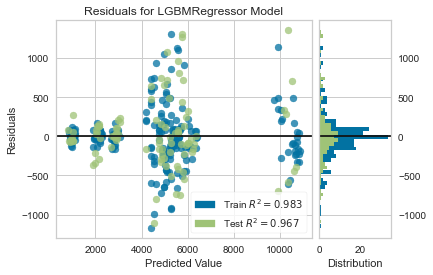

In [15]:
plot_model(lgbm, plot='residuals')

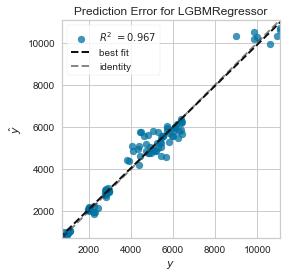

In [16]:
plot_model(lgbm, plot='error')

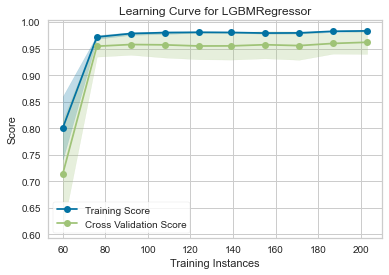

In [17]:
plot_model(lgbm, plot='learning')

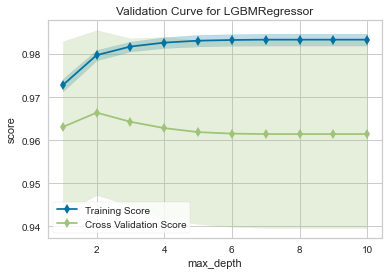

In [18]:
plot_model(lgbm, plot='vc')

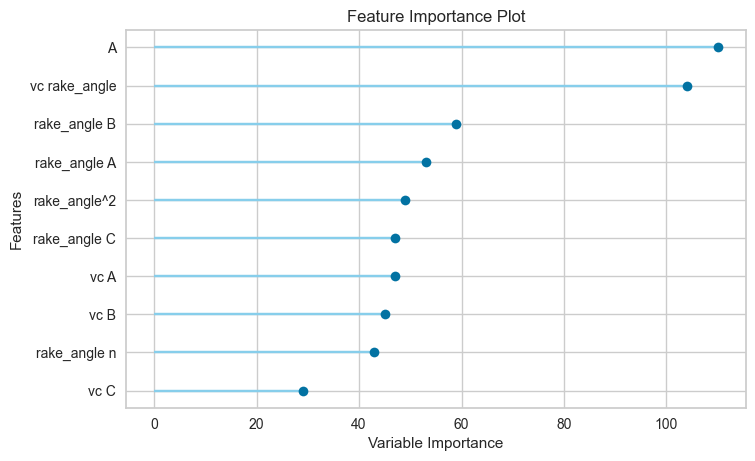

In [19]:
plot_model(lgbm, plot='feature')

In [20]:
save_model(lgbm,"models/lgbm_v0",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\99823827\AppData\Local\Temp\joblib),
          steps=[('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('trained_model', LGBMRegressor(random_state=4949))]),
 'models/lgbm_v0.pkl')

# Modelagem sem polynomial features

In [21]:
s = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=False,
          profile=False
)

,Description,Value
0,Session id,1831
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(324, 12)"
4,Transformed data shape,"(324, 12)"
5,Transformed train set shape,"(226, 12)"
6,Transformed test set shape,"(98, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,None


In [23]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:53:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,345.5288,233758.6752,477.7977,0.9578,0.1014,0.0785,0.0330
gbr,Gradient Boosting Regressor,355.1062,256031.3986,497.6145,0.9542,0.0986,0.0766,0.0370
knn,K Neighbors Regressor,358.5508,249965.3266,494.9110,0.9540,0.1015,0.0782,0.0140
catboost,CatBoost Regressor,359.7647,281506.1228,521.5496,0.9508,0.1045,0.0781,0.1510
llar,Lasso Least Angle Regression,383.8108,267076.2375,507.3246,0.9497,0.1094,0.0874,0.0120
lr,Linear Regression,383.7722,266980.1328,507.1040,0.9496,0.1092,0.0873,0.0470
lasso,Lasso Regression,385.0282,267595.6594,508.0514,0.9496,0.1111,0.0888,0.4040
rf,Random Forest Regressor,345.4601,279497.0385,520.2474,0.9496,0.1012,0.0733,0.0320
xgboost,Extreme Gradient Boosting,374.4546,316721.3094,550.4610,0.9447,0.1088,0.0797,0.1960
et,Extra Trees Regressor,372.6379,320550.2556,553.3668,0.9436,0.1071,0.0780,0.0300


## Investigando Lasso

In [24]:
lasso=create_model("lasso")
lasso

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:55:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Lasso Regression


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,307.1633,198336.4844,445.3499,0.9585,0.0934,0.0692
1,386.8020,250652.5625,500.6521,0.9671,0.0869,0.0733
2,362.7656,244445.5625,494.4144,0.9566,0.0904,0.0648
3,293.5306,157825.7969,397.2729,0.9685,0.1005,0.0773
4,443.0511,349961.6875,591.5756,0.9625,0.1180,0.0987
5,380.0340,288097.6250,536.7473,0.9397,0.1246,0.0977
6,557.7722,535782.8125,731.9719,0.8273,0.1415,0.1164
7,307.1191,148188.7656,384.9529,0.9766,0.0925,0.0805
8,434.5976,301634.8438,549.2130,0.9622,0.1078,0.0866


Lasso(random_state=1831)

In [25]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

A : 22.0549
B : 3.1327
m : 6569.6982


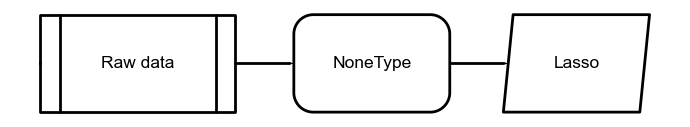

In [26]:
plot_model(lasso,"pipeline")

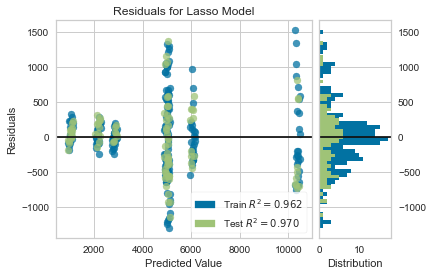

In [27]:
plot_model(lasso, plot='residuals')

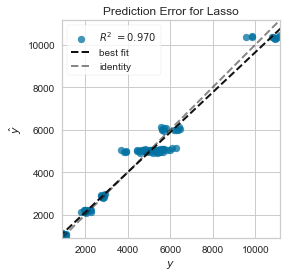

In [28]:
plot_model(lasso, plot='error')

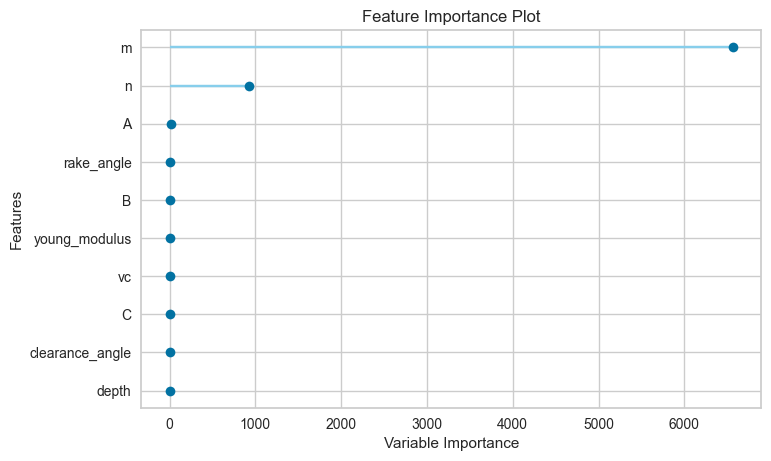

In [29]:
plot_model(lasso, plot='feature')

In [30]:
save_model(lasso,"models/lasso_v1",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\99823827\AppData\Local\Temp\joblib),
          steps=[('placeholder', None),
                 ('trained_model', Lasso(random_state=1831))]),
 'models/lasso_v1.pkl')

## Investigando LightGBM

In [31]:
lgbm=create_model("lightgbm")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:02:03
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,338.7084,230312.3188,479.9087,0.9518,0.1002,0.0743
1,389.0463,277467.3515,526.7517,0.9636,0.0813,0.0649
2,292.4834,151404.3744,389.1072,0.9731,0.0734,0.0548
3,260.2682,161608.6680,402.0058,0.9677,0.1021,0.0725
4,379.7824,287948.0220,536.6079,0.9692,0.1109,0.0871
5,335.3102,237481.4024,487.3206,0.9503,0.1075,0.0833
6,440.2531,351654.5610,593.0047,0.8866,0.1176,0.1000
7,303.1667,174971.8956,418.2964,0.9723,0.0852,0.0698
8,435.4070,322637.4953,568.0119,0.9595,0.1108,0.0862


In [32]:
lgbm

LGBMRegressor(random_state=1831)

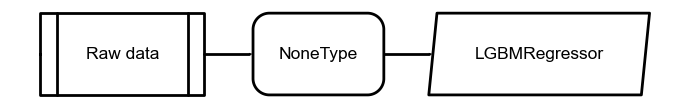

In [33]:
plot_model(lgbm, "pipeline")

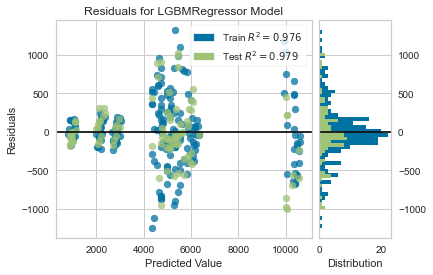

In [34]:
plot_model(lgbm, plot='residuals')

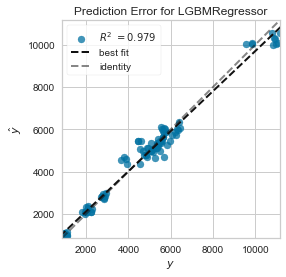

In [35]:
plot_model(lgbm, plot='error')

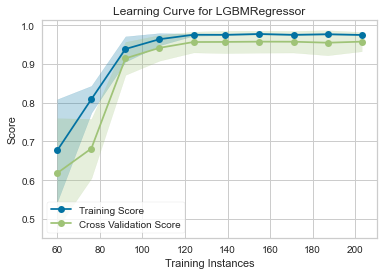

In [36]:
plot_model(lgbm, plot='learning')

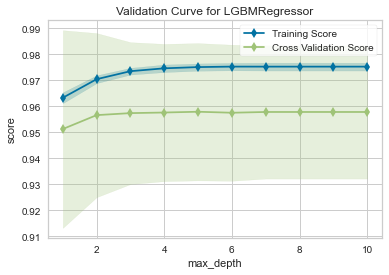

In [37]:
plot_model(lgbm, plot='vc')

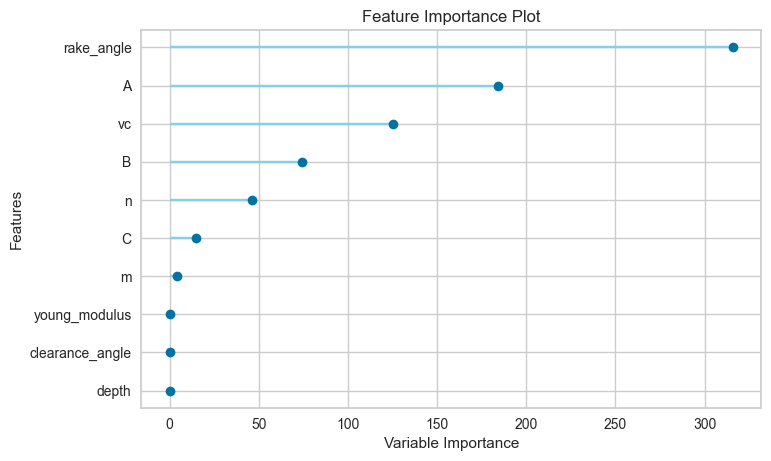

In [38]:
plot_model(lgbm, plot='feature')

In [39]:
save_model(lgbm,"models/lgbm_v1",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\99823827\AppData\Local\Temp\joblib),
          steps=[('placeholder', None),
                 ('trained_model', LGBMRegressor(random_state=1831))]),
 'models/lgbm_v1.pkl')

# Modelagem com polynomial features mas filtrando variáveis do material

In [40]:
df_1.columns

Index(['depth', 'vc', 'rake_angle', 'clearance_angle', 'expected_cut_force',
       'A', 'B', 'C', 'n', 'm', 'young_modulus', 'poisson_coef'],
      dtype='object')

In [41]:
df_2=df_1.drop([ 'A', 'B', 'C', 'n', 'm',],axis=1)

In [52]:
s = setup(df_2,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_2.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=False,
          profile=False
)

,Description,Value
0,Session id,5343
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(324, 7)"
4,Transformed data shape,"(324, 7)"
5,Transformed train set shape,"(226, 7)"
6,Transformed test set shape,"(98, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,None


In [51]:
best = compare_models()

## Investigando Lasso

In [53]:
lasso=create_model("lasso")
lasso

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:30:09
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Lasso Regression


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1485.0612,3735265.5000,1932.6835,0.4305,0.5501,0.5831
1,1573.9053,3968244.7500,1992.0454,0.0280,0.4681,0.4491
2,2352.0972,7559852.5000,2749.5186,0.2053,0.6107,0.6523
3,1710.3486,4341016.5000,2083.5105,0.3853,0.4182,0.3846
4,1649.2773,4021302.5000,2005.3186,-0.0539,0.5797,0.6216
5,1897.0509,6156286.0000,2481.1865,0.0462,0.5173,0.5322
6,2022.8251,6318448.0000,2513.6523,0.2874,0.4952,0.4891
7,1671.9696,4924861.5000,2219.2029,0.0484,0.4365,0.4188
8,1643.0476,4532926.0000,2129.0669,0.2030,0.4640,0.4274


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Lasso(random_state=5343)

In [54]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

vc : 0.0017
young_modulus : 0.3368


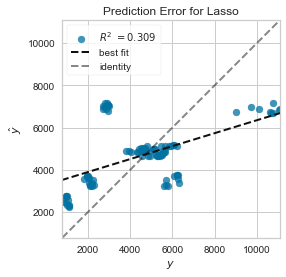

In [57]:
plot_model(lasso, plot='error')

## Investigando LightGBM

In [58]:
lgbm=create_model("lightgbm")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:30:36
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


In [59]:
lgbm

LGBMRegressor(random_state=5343)

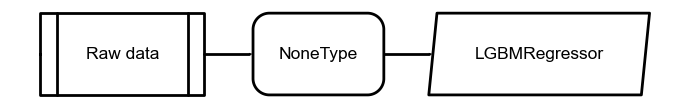

In [60]:
plot_model(lgbm, "pipeline")

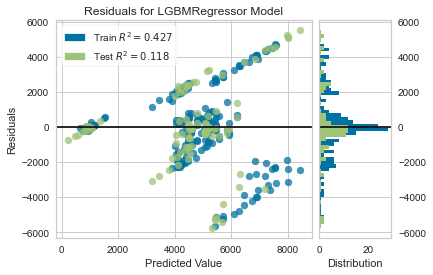

In [61]:
plot_model(lgbm, plot='residuals')

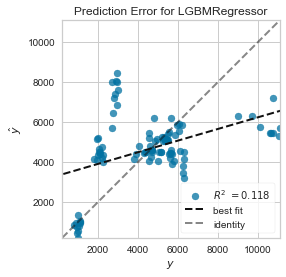

In [62]:
plot_model(lgbm, plot='error')